# Basic Exploration

| Author              | Description                                         |
|---------------------|-----------------------------------------------------|
| Anh Tu Duong Nguyen | This notebook is used to explore the dataset and visualize the distribution of certain variables to gain an initial understanding of the data and which preprocessing steps are necessary. |


In [1]:
%pip install pandas
%pip install emoji
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import emoji
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('../data/reviews.csv')
df.shape

(9073128, 10)

In [4]:
df

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
...,...,...,...,...,...,...,...,...,...,...
9073123,104824,CTJman,2014-06-08,,NaN,NaN,NaN,NaN,NaN,4.00
9073124,104824,IMSPEAKNOENGLISH,2014-06-06,,NaN,NaN,NaN,NaN,NaN,5.00
9073125,104824,twizzard,2014-06-05,,NaN,NaN,NaN,NaN,NaN,5.00
9073126,104824,bootdown21,2014-06-04,,NaN,NaN,NaN,NaN,NaN,4.50


In [5]:
df.describe()

,beer_id,look,smell,taste,feel,overall,score
count,9.073128e+06,5.283110e+06,5.283110e+06,5.283110e+06,5.283110e+06,5.283110e+06,9.073128e+06
mean,7.730655e+04,3.952155e+00,3.887863e+00,3.920704e+00,3.884350e+00,3.916280e+00,3.889815e+00
std,7.929345e+04,5.517191e-01,6.115909e-01,6.333365e-01,5.999279e-01,6.054554e-01,6.127417e-01
min,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.155400e+04,3.750000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.570000e+00
50%,5.654500e+04,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,1.076670e+05,4.250000e+00,4.250000e+00,4.250000e+00,4.250000e+00,4.250000e+00,4.250000e+00
max,3.731280e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [6]:
# Function to check if there is an emoji in the text
def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in text)

In [7]:
MAX_ROWS = 1000000
for index, row in df.head(MAX_ROWS).iterrows():
    if contains_emoji(row['text']):
        print(f"Row {index} has an emoji")

Row 60340 has an emoji
Row 66176 has an emoji
Row 76815 has an emoji
Row 84210 has an emoji
Row 103689 has an emoji
Row 104236 has an emoji
Row 104774 has an emoji
Row 117223 has an emoji
Row 128778 has an emoji
Row 139957 has an emoji
Row 161658 has an emoji
Row 195344 has an emoji
Row 199225 has an emoji
Row 210256 has an emoji
Row 267838 has an emoji
Row 277775 has an emoji
Row 282206 has an emoji
Row 290955 has an emoji
Row 327281 has an emoji
Row 328351 has an emoji
Row 339617 has an emoji
Row 342959 has an emoji
Row 369446 has an emoji
Row 373451 has an emoji
Row 388926 has an emoji
Row 397009 has an emoji
Row 401422 has an emoji
Row 404387 has an emoji
Row 413555 has an emoji
Row 457475 has an emoji
Row 502722 has an emoji
Row 513353 has an emoji
Row 535107 has an emoji
Row 548648 has an emoji
Row 563582 has an emoji
Row 582197 has an emoji
Row 640889 has an emoji
Row 658529 has an emoji
Row 663925 has an emoji
Row 708250 has an emoji
Row 713269 has an emoji
Row 716316 has an em

/tmp/ipykernel_347637/234922773.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bin_labels, y=score_counts.values, palette='viridis')


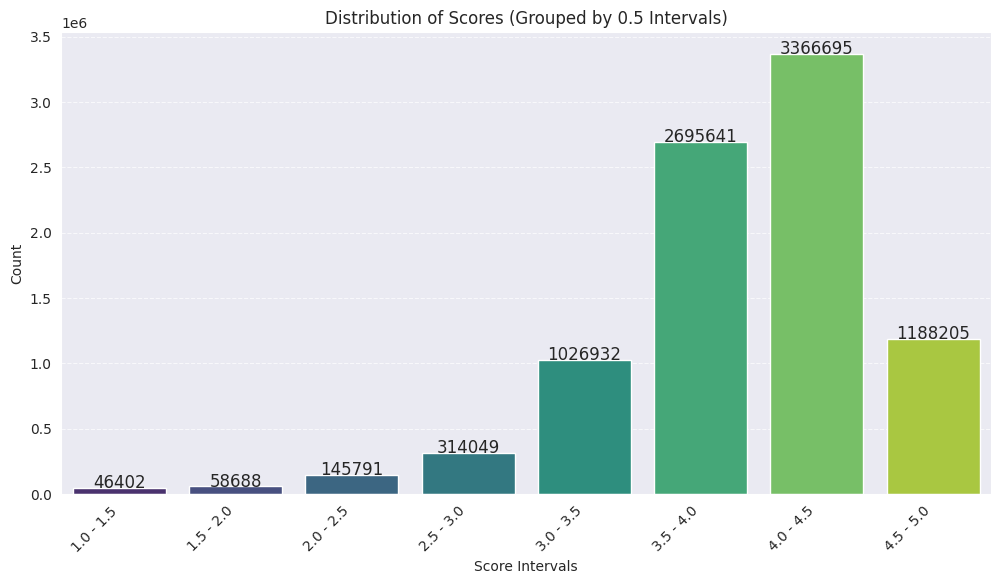

In [8]:
# Assuming the numerical scores column is named 'score'
min_score = df['score'].min()
max_score = df['score'].max()

# Create bins with intervals of 0.5
bins = np.arange(min_score, max_score + 0.5, 0.5)
df['score_bin'] = pd.cut(df['score'], bins, right=False)  # Right=False means left-inclusive

# Count occurrences in each bin
score_counts = df['score_bin'].value_counts().sort_index()

# Convert bins to string format for better display
bin_labels = [f"{interval.left:.1f} - {interval.right:.1f}" for interval in score_counts.index]

# Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=bin_labels, y=score_counts.values, palette='viridis')

# Add value labels on top of bars
for i, count in enumerate(score_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=12)

# Customize plot
plt.xlabel("Score Intervals")
plt.ylabel("Count")
plt.title("Distribution of Scores (Grouped by 0.5 Intervals)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

/tmp/ipykernel_347637/3343119197.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bin_labels, y=score_counts.values, palette='viridis')


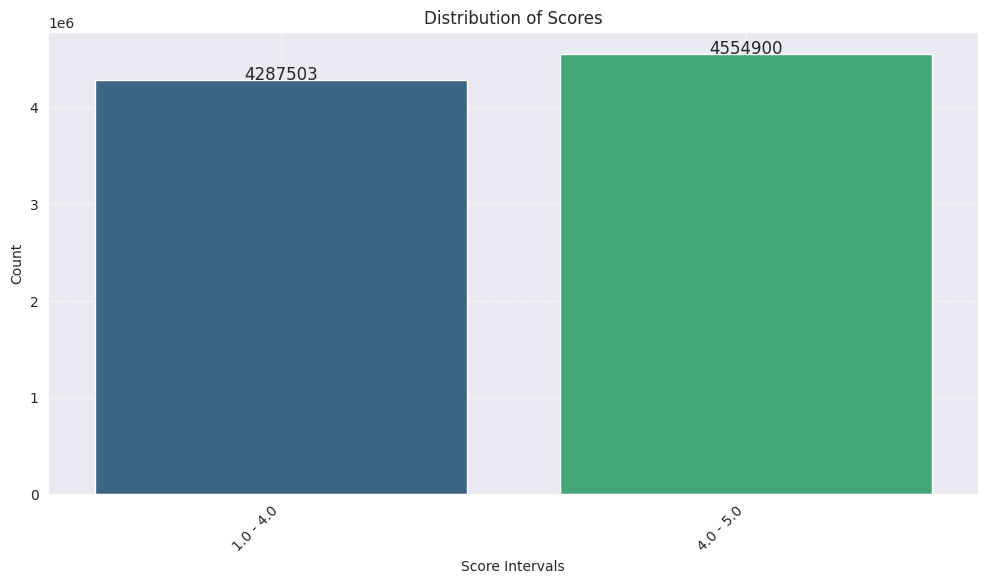

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined
min_score = df['score'].min()
max_score = df['score'].max()

# Define bins
bins = [1, 4, 5]
df['score_bin'] = pd.cut(df['score'], bins, right=False)  # Right=False means left-inclusive

# Count occurrences in each bin
score_counts = df['score_bin'].value_counts().sort_index()

# Convert bins to string format for better display
bin_labels = [f"{interval.left:.1f} - {interval.right:.1f}" for interval in score_counts.index]

# Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=bin_labels, y=score_counts.values, palette='viridis')

# Add value labels on top of bars
for i, count in enumerate(score_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=12)

# Customize plot
plt.xlabel("Score Intervals")
plt.ylabel("Count")
plt.title("Distribution of Scores")
plt.xticks(rotation=45, ha='right')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)  # Ensures grid is visible

# Show plot
plt.show()

In [10]:
# Extract the 'text' column and remove NaNs and empty strings
text_values = df["text"].dropna().astype(str)  # Convert to string to handle non-string values
text_values = text_values[text_values.str.strip() != ""]  # Remove empty strings
text_list = text_values.tolist()  # Convert to list

# Print the number of elements
print("Number of non-empty elements in 'text' column:", len(text_list))

Number of non-empty elements in 'text' column: 2987991


# Core Observations

* The dataset is highly skewed towards positive reviews, with a significant number of 4 or 5-star ratings.
* The dataset contains a large number of emojis
* The dataset contains a large number of empty strings in the text column, which needs to be removed

# Next Steps
* Remove emojis from the text
* Filter out empty strings
* Mismatch between and score needs to be analysed
* Further Downsizing the data is needed -> 3 million entries